In [1]:
from tkinter import font
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats

In [23]:
csv = "csv/400Hz_normal_2022_03_11_14_59_28.csv"
data = pd.read_csv(csv)
hz = csv.split("_")[0].split("/")[1]
print(hz)
print(data)

400Hz
        sequence  channel_0
0              0      -1311
1              1       1005
2              2       2198
3              3      -2171
4              4      -1602
...          ...        ...
910795    910795      10787
910796    910796      29167
910797    910797      20173
910798    910798      24641
910799    910799     -11458

[910800 rows x 2 columns]


In [25]:
data.drop(["sequence"], axis = 1, inplace = True)

In [26]:
# print(len(data.values.T[0]))
col_count = len(data)
# print(col_count)

col_countList = []
for i in range(col_count):
    col_countList.append(i)

print(len(col_countList))

910800



[217622447741531.4, 68389731976429.984, 33074465525459.35, 20261645268544.082, 12836402153965.39, 9135103538788.469, 6623917542538.305, 5055649182327.128, 3978353653593.1753]


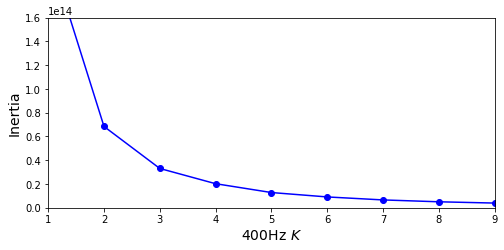

In [27]:
# 測試 K = 1~9，選擇迅速下降轉為平緩的點
kmeans_list = [KMeans(n_clusters=k).fit(data)
               for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

print("\f")
print(inertias)

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel(f"{hz} $K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 9, 0, 160000000000000])
plt.show()

In [33]:
k = 3

In [34]:
# 單跑一次，並評估平均值，且預測
kmeansModel = KMeans(n_clusters=k)
clusters_pred = kmeansModel.fit_predict(data)

# 每個點到其他叢集的質心的距離之和
print(kmeansModel.inertia_)

# 特徵的中心點
print(kmeansModel.cluster_centers_)

y_means = kmeansModel.predict(data)

print(y_means)

33072681057771.47
[[   325.11251217]
 [-19167.67977786]
 [ 17676.90381286]]
[0 0 0 ... 2 2 1]


In [35]:
# hcluster = cluster.AgglomerativeClustering(
#     linkage="word", affinity="euclidean", n_clusters=3)

# hcluster.fix(data)
# cluster_label = hcluster.labels_
# print(cluster_label)
# print("------------")

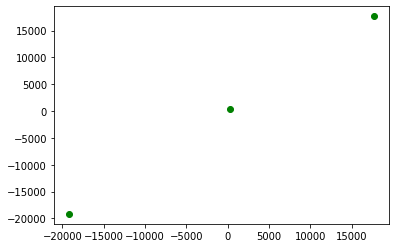

In [36]:
plt.scatter(kmeansModel.cluster_centers_[:,0], kmeansModel.cluster_centers_[:,:],
            c="g")

/var/folders/25/ycj24rw97dq9s4_ylj83kprw0000gn/T/ipykernel_70482/988722342.py:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "linewidth" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(f"{hz}_KMeans_k_{k}.png", dpi = 100, bbox_inches = "tight", pad_inches = 1, facecolor="w", edgecolor = "b", transparent = False, linewidth = 5)


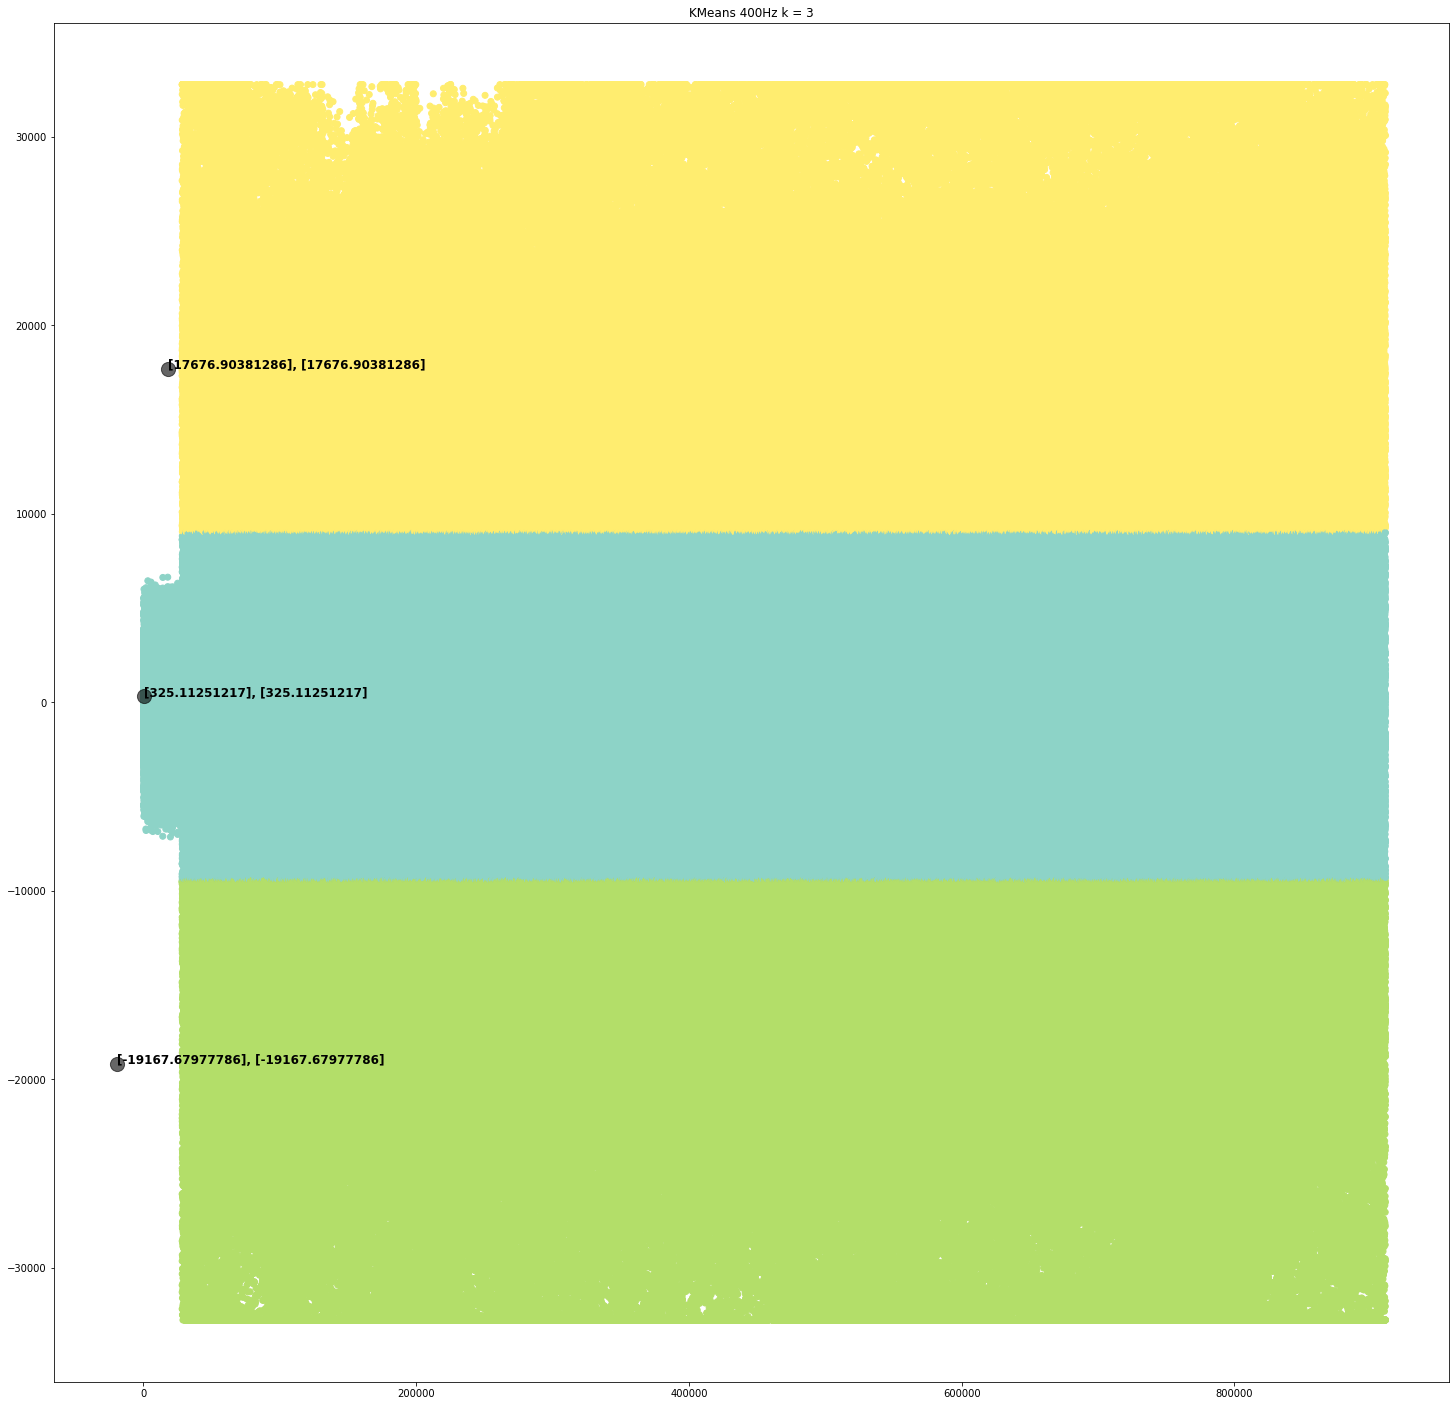

In [37]:
fig = plt.gcf()
fig.set_size_inches(25, 25)
# plt.subplot(222)
plt.title(f'KMeans {hz} k = {k}')
plt.scatter(col_countList, data, c=y_means, cmap=plt.cm.Set3)
plt.scatter(kmeansModel.cluster_centers_[:,:], kmeansModel.cluster_centers_[:,:], color='black', s=200, alpha=0.6)



# 標上各分組中心點座標
for i in range(kmeansModel.cluster_centers_.shape[0]): 
    plt.text(kmeansModel.cluster_centers_[i], kmeansModel.cluster_centers_[i], str(f"{kmeansModel.cluster_centers_[i]}, {kmeansModel.cluster_centers_[i]}"),
             fontdict={'color': 'black', 'weight': 'bold', 'size': 12})

fig.savefig(f"{hz}_KMeans_k_{k}.png", dpi = 100, bbox_inches = "tight", pad_inches = 1, facecolor="w", edgecolor = "b", transparent = False, linewidth = 5)
plt.show()

In [21]:
# silhouette_score = [silhouette_score(data, model.labels_)
#                     for model in kmeans_list[1:]]

# print("\f")
# print(silhouette_score)

# sns.lmplot("channel_0", hue="channel_0", data=data, fit_reg=False)

In [22]:
print(kmeansModel.inertia_/col_count)

62596139.94699793
